In [7]:
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import metpy
from pathlib import Path
import cartopy.crs as ccrs

import gvpy as gv

import niskine

In [22]:
conf = niskine.io.load_config()
m1lon, m1lat, m1bottom_depth = niskine.io.mooring_location(mooring=1)
m2lon, m2lat, m2bottom_depth = niskine.io.mooring_location(mooring=2)
m3lon, m3lat, m3bottom_depth = niskine.io.mooring_location(mooring=3)
root_dir = '/Users/zcasparcohen/codes/NIW/data/'

In [3]:
alt = niskine.io.load_ssh()

In [4]:
alt['eke'] = 1/2 * (alt.ugosa**2 + alt.vgosa**2)

In [5]:
f = gv.ocean.inertial_frequency(m1lat)


In [9]:
vort = metpy.calc.vorticity(alt.ugosa, alt.vgosa)
vort = vort.metpy.dequantify()
vort = vort / f
vort.attrs = dict(long_name='$\zeta / f$', units='')

(<matplotlib.patches.Rectangle at 0x13523ad10>,
 (<matplotlib.patches.ConnectionPatch at 0x1350a1fd0>,
  <matplotlib.patches.ConnectionPatch at 0x13472e0d0>))

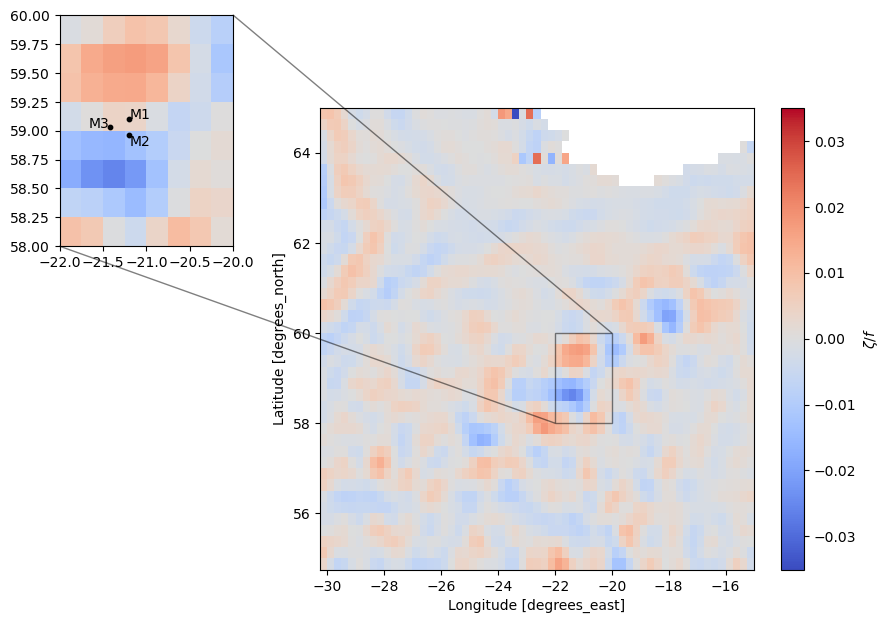

In [54]:
fig,ax = plt.subplots(figsize=(7,6))
vort.mean('time').plot(ax=ax,cmap='coolwarm',cbar_kwargs={'label':r'$\zeta /f $'})
#ax.scatter(m1lon,m1lat,s=2);ax.scatter(m2lon,m2lat,s=2);ax.scatter(m3lon,m3lat,s=2)
axins = ax.inset_axes([-0.6, 0.7, 0.4, 0.5])
vort.mean('time').plot(ax=axins,cmap='coolwarm',add_colorbar=False)
axins.set_xlim((-22),(-20))
axins.set_ylim((58),(60))
axins.scatter(m1lon,m1lat,s=10,c='k');axins.scatter(m2lon,m2lat,s=10,c='k');axins.scatter(m3lon,m3lat,s=10,c='k')
axins.set_ylabel('');axins.set_xlabel('')
axins.text(m1lon,m1lat,'M1');axins.text(m2lon,m2lat-0.1,'M2');axins.text(m3lon-0.25,m3lat,'M3')
ax.indicate_inset_zoom(axins,edgecolor='black')

In [71]:
from datetime import datetime
_time = vort.time
v0=0.25

In [73]:
_time

<xarray.DataArray 'time' (time: 5725)>
array(['2005-05-01T00:00:00.000000000', '2005-05-02T00:00:00.000000000',
       '2005-05-03T00:00:00.000000000', ..., '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-05-01 2005-05-02 ... 2021-01-01
Attributes:
    axis:                 T
    long_name:            Time
    standard_name:        time
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            20209.0
    valid_max:            25933.0
    _metpy_axis:          time

In [ ]:
for i,t in enumerate(_time[:]):
    fig,ax = plt.subplots(figsize=(10,6))
    vort.sel(time=t).plot(ax=ax,vmax=v0,vmin=-v0,cmap='coolwarm',cbar_kwargs={'label':r'$\zeta /f $'})
#ax.scatter(m1lon,m1lat,s=2);ax.scatter(m2lon,m2lat,s=2);ax.scatter(m3lon,m3lat,s=2)
    axins = ax.inset_axes([-0.6, 0.25, 0.4, 0.5])
    vort.sel(time=t).plot(ax=axins,vmax=v0,vmin=-v0,cmap='coolwarm',add_colorbar=False)
    ax.set_title(datetime.utcfromtimestamp(t.values.astype(int) * 1e-9).strftime('%m/%d/%Y, %H:%M:%S'))
    #fig.suptitle(datetime.utcfromtimestamp(t.values.astype(int) * 1e-9).strftime('%m/%d/%Y, %H:%M:%S'),x=0.6)
    axins.set_xlim((-22),(-20))
    axins.set_ylim((58),(60))
    axins.scatter(m1lon,m1lat,s=10,c='k');axins.scatter(m2lon,m2lat,s=10,c='k');axins.scatter(m3lon,m3lat,s=10,c='k')
    axins.set_ylabel('');axins.set_xlabel('')
    axins.text(m1lon,m1lat,'M1');axins.text(m2lon,m2lat-0.1,'M2');axins.text(m3lon-0.25,m3lat,'M3')
    axins.set_title('')
    ax.indicate_inset_zoom(axins,edgecolor='black')
    #plt.show();
    fig.tight_layout()
    fig.savefig('/Users/zcasparcohen/Documents/fig/vort_time%s.png'%(i));
    fig.clear()
    plt.close(fig)

In [95]:
m1vort = vort.interp(lon=m1lon, lat=m1lat)
m1eke = alt.eke.interp(lon=m1lon, lat=m1lat)

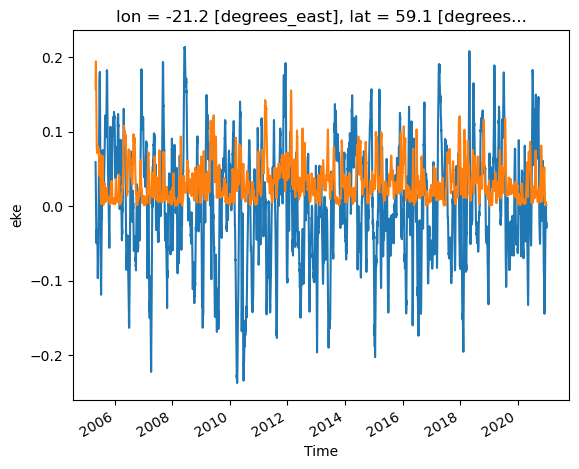

In [14]:
m1vort.plot()
m1eke.plot()